## (32) Scikit learn
- Scikit(Scipy Toolkit)_learn을 의미 / SK-Learn이라고도 함

#### 1) Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [6]:
diabetes_X = diabetes.data[:, np.newaxis, 2] # 새로운 축에 기존data의 모든 행의 2번idx인 col값을 담어라
print(diabetes_X) # 모든 값들이 각각 list([]) 담긴 형태로 나온다
# diabetes_X = diabetes.data[:, 2]
# print()
# print(diabetes_X) # 하나의 list에 모든 값들이 담긴 형태로 나온다.

#질문! 이 두가지가 각각 언제 유용하게 쓰이는건지

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [7]:
diabetes_X_train = diabetes_X[:-20] # 20개를 제외하곤 모두 모델을 트레이닝 하는데 쓰겠다는 뜻
diabetes_X_test = diabetes_X[-20:] # 마지막 20개는 모델을 평가하는 test data로 쓰겠다는 뜻.
print(len(diabetes_X_train))
print(len(diabetes_X_test))
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

422
20


In [8]:
# 모델 만들기
regr = linear_model.LinearRegression(copy_X=0)

# 만든 모델에 fitting하기
regr.fit(diabetes_X_train, diabetes_Y_train)
regr # 이거하면 상관계수가 나온다.

print(regr.coef_)
print(regr.intercept_)
# The mean squared error : 평균 제곱 오차 = (예측치 - 실제값)^2 : 오차니깐 작을수록 좋다고 생각하자
print('Mean squared error : %.2f'% np.mean((regr.predict(diabetes_X_test)-diabetes_Y_test) **2))
# Explained variance score : 1 is perfect prediction
print('Variance score(test) : ', regr.score(diabetes_X_test, diabetes_Y_test))
print('Variance score(train) : ', regr.score(diabetes_X_train, diabetes_Y_train))

[ 938.23786125]
152.918861826
Mean squared error : 2548.07
Variance score(test) :  0.472575447982
Variance score(train) :  0.335098155788


([], <a list of 0 Text yticklabel objects>)

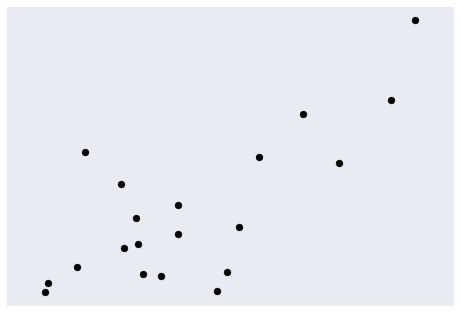

In [9]:
plt.scatter(diabetes_X_test, diabetes_Y_test, color = 'black') # testdata들에 대한 산점도를 그린다.
# plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color = 'blue') 
# test data를 모델에 넣어서 예측한 값으로 plot을 구한거
plt.xticks(())
plt.yticks(()) # ticks를 없애는거

### K-Nearest Neighbors Example
#### - No model(no formula) is used, only data is used for KNN

In [15]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

iris = datasets.load_iris()
X = iris.data[:, :2]

y = iris.target

h = .02 # 한칸의 간격을 0.02로 한다는 뜻

In [16]:
# X의 두개의 칼럼과 y의 1개의 칼럼으로 3개의 칼럼을 가지고있는 DataFrame만들기
X_1 = []
X_2 = []
for i in range(len(X)):
    X_1.append(X[i][0])
    X_2.append(X[i][1])

Data = {'sepal length' : X_1, 'sepal width' : X_2, 'target' : y} 
df = pd.DataFrame(Data)
df

,sepal length,sepal width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [17]:
# Create Color maps for each class
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [18]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'uniform')
clf.fit(X,y)

clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

[3.2999999999999998, 8.9000000000000004, 1.0, 5.4000000000000004]

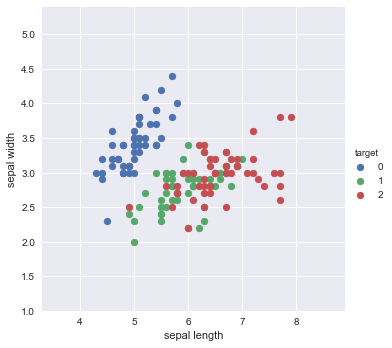

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1
# plt.plot(df['sepal length'], df['sepal width'], 'bs')
sns.FacetGrid(df, hue='target', size=5).map(plt.scatter, 'sepal length', 'sepal width').add_legend()
# print(x_min, x_max, y_min, y_max)
plt.axis([x_min, x_max, y_min, y_max])

In [31]:
# x_min : 3.3, x_max : 8.9, y_min : 1.0, y_max : 5.4, h = 0.02
# h만큼의 간격으로 x는 280간격, y는 220간격임
# xx는 (220, 280) : 280개 리스트가 220번 반복
# yy는 (280, 220) : 220개 리스트가 280번 반복

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# np.arange(X, Y)라고 봤을 때 : 모든 X 220개마다 280개가 대응되는 형태임 
# (모든 X의 경우, 모든 Y의 경우) 따라서, 이렇게 됐을때 모든 경우의 수는 220 x 280개 이고
# x값 한 개당 y값 280개가 있기때문에 / xx, yy의 형태는 (220, 280)

xx[:2,:5], xx.shape, yy[:2, :5], yy.shape # 이 코드는 간단하게 1행, 2행에서 element를 5개씩 보려는 것임

(array([[ 3.3 ,  3.32,  3.34,  3.36,  3.38],
        [ 3.3 ,  3.32,  3.34,  3.36,  3.38]]),
 (220, 280),
 array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
        [ 1.02,  1.02,  1.02,  1.02,  1.02]]),
 (220, 280))

In [32]:
# ravel function은 flatten하게 만들어주는 함수이다.
xr = xx.ravel()
yr = yy.ravel()

xr, xr.shape, yr, yr.shape

(array([ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88]),
 (61600,),
 array([ 1.  ,  1.  ,  1.  , ...,  5.38,  5.38,  5.38]),
 (61600,))

In [36]:
xy = np.c_[xr, yr]
xy[1:60]

array([[ 3.32,  1.  ],
       [ 3.34,  1.  ],
       [ 3.36,  1.  ],
       [ 3.38,  1.  ],
       [ 3.4 ,  1.  ],
       [ 3.42,  1.  ],
       [ 3.44,  1.  ],
       [ 3.46,  1.  ],
       [ 3.48,  1.  ],
       [ 3.5 ,  1.  ],
       [ 3.52,  1.  ],
       [ 3.54,  1.  ],
       [ 3.56,  1.  ],
       [ 3.58,  1.  ],
       [ 3.6 ,  1.  ],
       [ 3.62,  1.  ],
       [ 3.64,  1.  ],
       [ 3.66,  1.  ],
       [ 3.68,  1.  ],
       [ 3.7 ,  1.  ],
       [ 3.72,  1.  ],
       [ 3.74,  1.  ],
       [ 3.76,  1.  ],
       [ 3.78,  1.  ],
       [ 3.8 ,  1.  ],
       [ 3.82,  1.  ],
       [ 3.84,  1.  ],
       [ 3.86,  1.  ],
       [ 3.88,  1.  ],
       [ 3.9 ,  1.  ],
       [ 3.92,  1.  ],
       [ 3.94,  1.  ],
       [ 3.96,  1.  ],
       [ 3.98,  1.  ],
       [ 4.  ,  1.  ],
       [ 4.02,  1.  ],
       [ 4.04,  1.  ],
       [ 4.06,  1.  ],
       [ 4.08,  1.  ],
       [ 4.1 ,  1.  ],
       [ 4.12,  1.  ],
       [ 4.14,  1.  ],
       [ 4.16,  1.  ],
       [ 4.

In [37]:
Z = clf.predict(xy)
Z

array([0, 0, 0, ..., 2, 2, 2])

In [38]:
Z = Z.reshape(xx.shape)
Z, Z.shape

(array([[0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        ..., 
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]]), (220, 280))

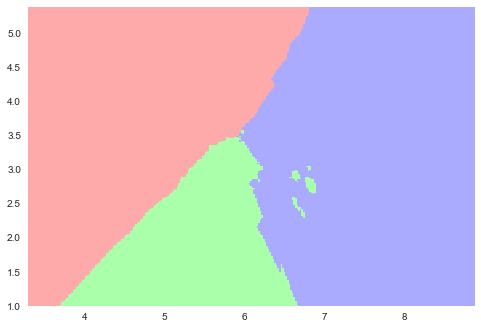

In [44]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

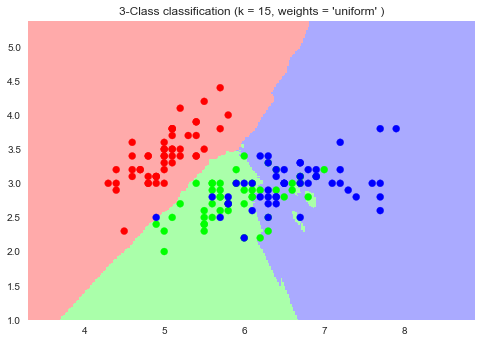

In [48]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=cmap_bold) # c=y : color을 y값별로 준다는 것이다 중요한 옵션!!! 
# cmap은 면적단위 색깔이라 생각하자
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = 'uniform' )" %(n_neighbors))

### Decision Tree Classifier : Supervised learning model

In [52]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [55]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                     feature_names=iris.feature_names,
                     class_names = iris.target_names,
                     filled=True, rounded=True,
                     special_characters = True)
# 분류할때 기준이되는 column들은 feature_names에 나오는 name들이고
# class_names는 최종적으로 어떤 분류인지 알려주는거 target에 해당한다.
dot_data.getvalue() # dot language code를 가져옴 이걸 기반으로 그림 / 복사해서 webgraphviz에서도 그릴 수 있음.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')

True

In [40]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

### Neural-Network 
#### :Black Box model이라 어떤 과정을 통해 결과가 나왔는지 이해하기 어렵다

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [59]:
X, y = mnist.data / 255., mnist.target

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

len(X_train)
len(X_test)

10000

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, alpha=1e-4, 
                    solver='sgd', verbose=10, tol=1e-4, random_state = 1, learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Iteration 11, loss = 0.04188246
Iteration 12, loss = 0.03864420
Iteration 13, loss = 0.03513415
Iteration 14, loss = 0.03222310
Iteration 15, loss = 0.02956183
Iteration 16, loss = 0.02620840
Iteration 17, loss = 0.02424569
Iteration 18, loss = 0.02129204
Iteration 19, loss = 0.02030622
Iteration 20, loss = 0.01848272
Iteration 21, loss = 0.01671861
Iteration 22, loss = 0.01520329
Iteration 23, loss = 0.01411466
Iteration 24, loss = 0.01292346
Iteration 25, loss = 0.01138195
Iteration 26, loss = 0.00996422
Iteration 27, loss = 0.00846271
Iteration 28, loss = 0.00736762
Iteration 29, loss = 0.00692193
Iteration 30, loss = 0.00544863


C:\Users\1\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [68]:
print('Training set score: %f' % mlp.score(X_train, y_train))
print('Test set score: %f' % mlp.score(X_test, y_test))

Training set score: 0.999483
Test set score: 0.973400


### K-Means Clustering : Unsupervised learning model

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 2:4], iris.target

X.shape, X

((150, 2), array([[ 1.4,  0.2],
        [ 1.4,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.7,  0.4],
        [ 1.4,  0.3],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.5,  0.2],
        [ 1.6,  0.2],
        [ 1.4,  0.1],
        [ 1.1,  0.1],
        [ 1.2,  0.2],
        [ 1.5,  0.4],
        [ 1.3,  0.4],
        [ 1.4,  0.3],
        [ 1.7,  0.3],
        [ 1.5,  0.3],
        [ 1.7,  0.2],
        [ 1.5,  0.4],
        [ 1. ,  0.2],
        [ 1.7,  0.5],
        [ 1.9,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.4],
        [ 1.5,  0.2],
        [ 1.4,  0.2],
        [ 1.6,  0.2],
        [ 1.6,  0.2],
        [ 1.5,  0.4],
        [ 1.5,  0.1],
        [ 1.4,  0.2],
        [ 1.5,  0.1],
        [ 1.2,  0.2],
        [ 1.3,  0.2],
        [ 1.5,  0.1],
        [ 1.3,  0.2],
        [ 1.5,  0.2],
        [ 1.3,  0.3],
        [ 1.3,  0.3],
        [ 1.3,  0.2],
        [ 1.6,  0.6],
        [ 1.9,  0.4],


In [2]:
# 모델 만들고 FIt하기 : 모든 모델들은 이 과정이 필요하다
est = KMeans(n_clusters=3)
est.fit(X)

est

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = est.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

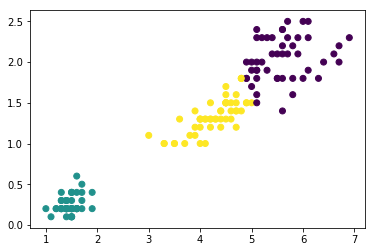

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

### EDA : 탐색적 자료분석

#### (1) Pandas & Linear Regression from sklearn

In [20]:
import numpy as np
from sklearn import datasets, linear_model, tree
import matplotlib.pyplot as plt
import pandas as pd

length = 10
x = np.arange(length, dtype=float).reshape((length, 1))
y = x + (np.random.rand(length)*10).reshape((length, 1))


print(x)
print()
print(y)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]

[[  8.6312763 ]
 [  9.53416216]
 [  4.15734757]
 [ 12.39458576]
 [ 13.61500483]
 [ 10.45158969]
 [  8.16360552]
 [ 15.32046093]
 [ 13.97693406]
 [ 17.24432054]]


In [21]:

origin = np.concatenate((x,y), axis = 1)
input_data = pd.DataFrame(data=origin, columns = ('x','y'))

print(origin)
print()
print(input_data)

[[  0.           8.6312763 ]
 [  1.           9.53416216]
 [  2.           4.15734757]
 [  3.          12.39458576]
 [  4.          13.61500483]
 [  5.          10.45158969]
 [  6.           8.16360552]
 [  7.          15.32046093]
 [  8.          13.97693406]
 [  9.          17.24432054]]

     x          y
0  0.0   8.631276
1  1.0   9.534162
2  2.0   4.157348
3  3.0  12.394586
4  4.0  13.615005
5  5.0  10.451590
6  6.0   8.163606
7  7.0  15.320461
8  8.0  13.976934
9  9.0  17.244321


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


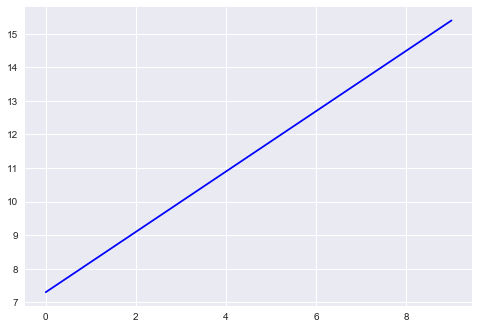

In [22]:
x2 = input_data.x.values
y2 = input_data.y.values
print(x2
     )
x2 = x2.reshape(length, 1)
y2 = y2.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(x2,y2)

plt.plot(x2, regr.predict(x2), color='blue') # 이렇게 시각화 해줄 수 있다.

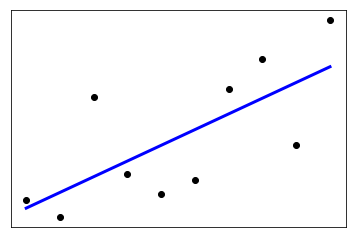

Origin Type : <class 'numpy.ndarray'>
X Type : <class 'numpy.ndarray'>
Y Type : <class 'numpy.ndarray'>


In [25]:
plt.scatter(x2, y2, color = 'black')
plt.plot(x2, regr.predict(x2), color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

print('Origin Type : ' + str(type(origin)))
print('X Type : ' + str(type(x2)))
print('Y Type : ' + str(type(y2)))

#### (2) Pandas & Decision Tree from sklearn

In [32]:
from sklearn import tree
from sklearn.externals.six import StringIO

In [33]:
z = pd.DataFrame(data = [1,1,1,1,1,2,2,2,2,2])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(input_data, z)
input_data


,x,y
0,0.0,5.882912
1,1.0,5.168064
2,2.0,10.330115
3,3.0,7.016596
4,4.0,6.142078
5,5.0,6.767010
6,6.0,10.676539
7,7.0,11.966807
8,8.0,8.274115
9,9.0,13.618116


In [34]:
print(clf.predict([[3, 3.01]]))
print(clf.predict([[7, 7.002]]))
print("Data type : " + str(type(input_data)))
print("Z Type : " + str(type(z)))
print("Done")

[1]
[2]
Data type : <class 'pandas.core.frame.DataFrame'>
Z Type : <class 'pandas.core.frame.DataFrame'>
Done


In [38]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                     feature_names=['x','y'],
                     class_names = z,
                     filled=True, rounded=True,
                     special_characters = True)
# 분류할때 기준이되는 column들은 feature_names에 나오는 name들이고
# class_names는 최종적으로 어떤 분류인지 알려주는거 target에 해당한다.
dot_data.getvalue() # dot language code를 가져옴 이걸 기반으로 그림 / 복사해서 webgraphviz에서도 그릴 수 있음.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('another.pdf')

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U75') dtype('<U75') dtype('<U75')